## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Data Exploration

In [4]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alma better/Capstone Project 1/Telecom Project/ Churn.csv")

In [ ]:
#check the decoration
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])

Rows     :  3333
Columns  :  20


In [ ]:
df.count()

State                     3333
Account length            3333
Area code                 3333
International plan        3333
Voice mail plan           3333
Number vmail messages     3333
Total day minutes         3333
Total day calls           3333
Total day charge          3333
Total eve minutes         3333
Total eve calls           3333
Total eve charge          3333
Total night minutes       3333
Total night calls         3333
Total night charge        3333
Total intl minutes        3333
Total intl calls          3333
Total intl charge         3333
Customer service calls    3333
Churn                     3333
dtype: int64

In [5]:
df.shape

(3333, 20)

In [6]:
#Checking info of data as data types and rows n cols
 # we see that we have 13300 observations and no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
print ("\nUnique values :  \n",df.nunique())


Unique values :  
 State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64


# Variable Breakdown
STATE: 51 Unique States in United States of America

Account Length: Length of The Account

Area Code 415 relates to San Francisco,408 is of San Jose and 510 is of City of Okland

International Plan: Yes Indicate International Plan is Present and No Indicates no subscription for International Plan

Voice Mail Plan: Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

Number vmail messages: Number of Voice Mail Messages ranging from 0 to 50

Total day minutes: Total Number of Minutes Spent By Customers in Morning

Total day calls: Total Number of Calls made by Customer in Morning.

Total day charge: Total Charge to the Customers in Morning.

Total eve minutes:Total Number of Minutes Spent By Customers in Evening

Total eve calls: Total Number of Calls made by Customer in Evening.

Total eve charge: Total Charge to the Customers in Morning.

Total night minutes: Total Number of Minutes Spent By Customers in the Night.

Total night calls: Total Number of Calls made by Customer in Night.

Total night charge: Total Charge to the Customers in Night.

In [ ]:
# Explore data
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#We can change the column type with the astype method. Let's apply this method to the Churn feature to convert it into int64

In [ ]:
df['Churn'] = df['Churn'].astype('int64')

In [ ]:
# descriptive analysis
#The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [ ]:
# Then I can see non numerical features
df.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [ ]:
df['Churn'].unique()

array([0, 1])

In [ ]:
#Maximum and Minimum number of churn values count available in category

In [ ]:
## Churners vs Non-Churners 
df['Churn'].value_counts()


0    2850
1     483
Name: Churn, dtype: int64

In [ ]:
# As I can conclude above  2850 users out of 3333 are loyal; their Churn value is 0 and  churn value count both categories is show lots of difference false and true class which shows my dataset is imbalanced date set

In [ ]:
#Checking missing values in df dataset
print(df.isnull().sum())  

#no missing value present in the df data



State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [ ]:
#To find out if one State has more churners compared to another.


# Count the number of churners and non-churners by State 
print(df.groupby('State')['Churn'].value_counts()) 

State  Churn
AK     0        49
       1         3
AL     0        72
       1         8
AR     0        44
                ..
WI     1         7
WV     0        96
       1        10
WY     0        68
       1         9
Name: Churn, Length: 102, dtype: int64


In [ ]:
numeric_var = df.select_dtypes(include=[np.number])
numeric_var.columns

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'Churn'],
      dtype='object')

In [ ]:
#All continous variables in cname
cname = df.columns[(df.dtypes=="float64")|(df.dtypes=="int64")].tolist()
print(cname)

#All categorical var in cat_names and removing target var
cat_names = df.select_dtypes(include=np.number).columns.tolist()
cat_names.remove('Churn')
cat_names

['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


['Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

In [ ]:
df.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:

df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

In [ ]:
#descriptive statistics summary
df['Churn'].describe()

count    3333.000000
mean        0.144914
std         0.352067
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Churn, dtype: float64

#1.2 Visulizations



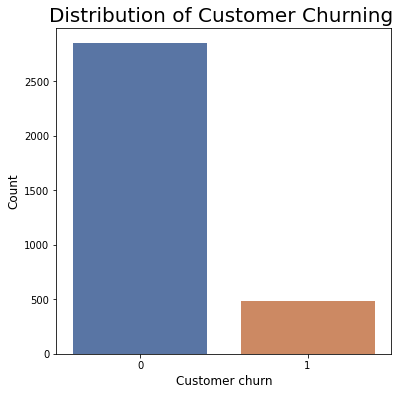

In [ ]:
#Target Variable data distribution
plt.figure(figsize=(6,6))
sns.countplot(x = df.Churn,palette='deep')
plt.xlabel('Customer churn', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.title("Distribution of Customer Churning ",fontsize= 20)
plt.show()

#As we can see easily say my class false counts customer churn categories class shows more than true class customer it is clear that this dataset imbalanced data set.

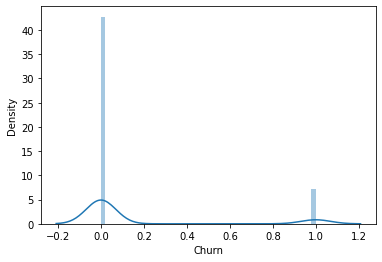

In [ ]:
#histogram
sns.distplot(df['Churn']);

In [ ]:
#Groupby --> size to represent ---> unstack the category
#df.groupby(["state", "Churn"]).size().unstack(level=-1).head()

#Relationational bar graph for checking data distribution with respect to target variable
def diff_bar(x,y):
    
    df.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 40)
    plt.show()

In [ ]:
#Relationational bar graph for checking data distribution with respect to target variable
def diff_bar(x,y):

    df.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 40)
    plt.show() 


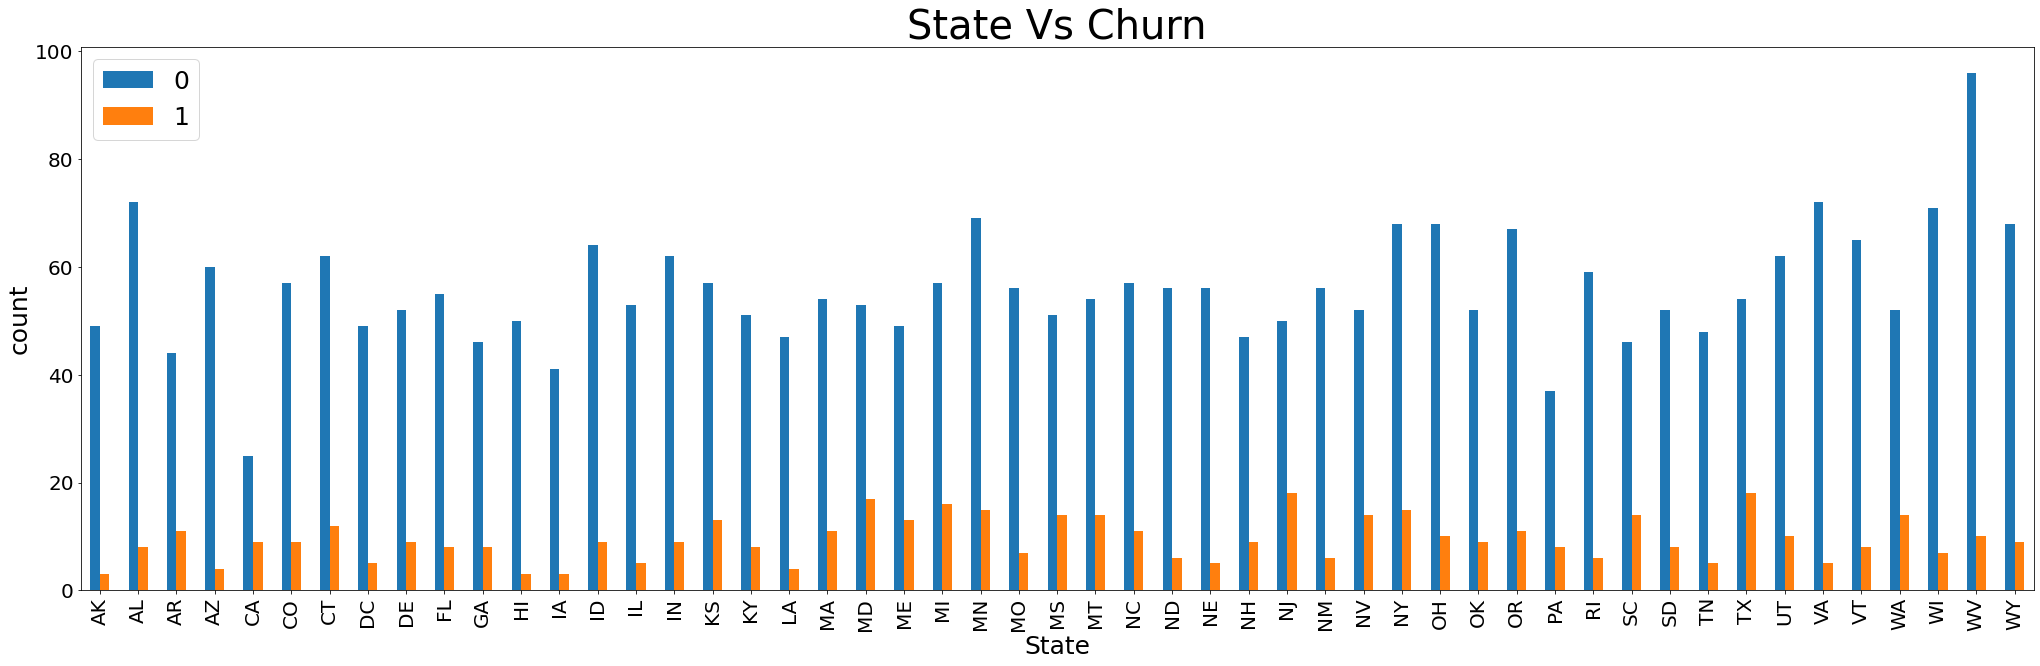

In [ ]:
#State Wise Churning of customer
diff_bar('State','Churn')

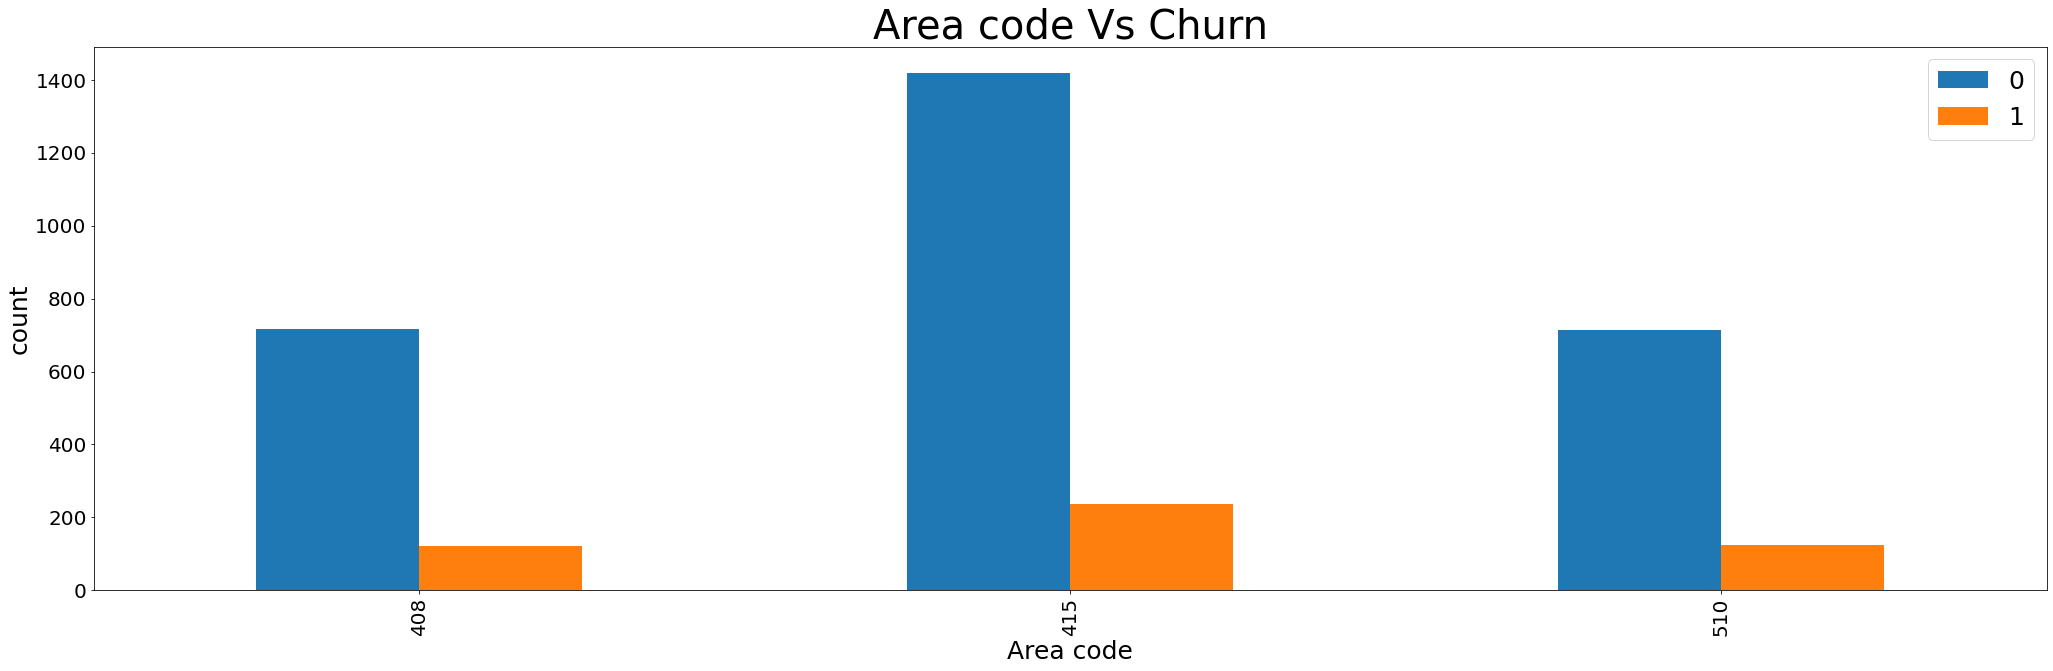

In [ ]:
#area_code Wise Churning of customer
diff_bar('Area code','Churn')

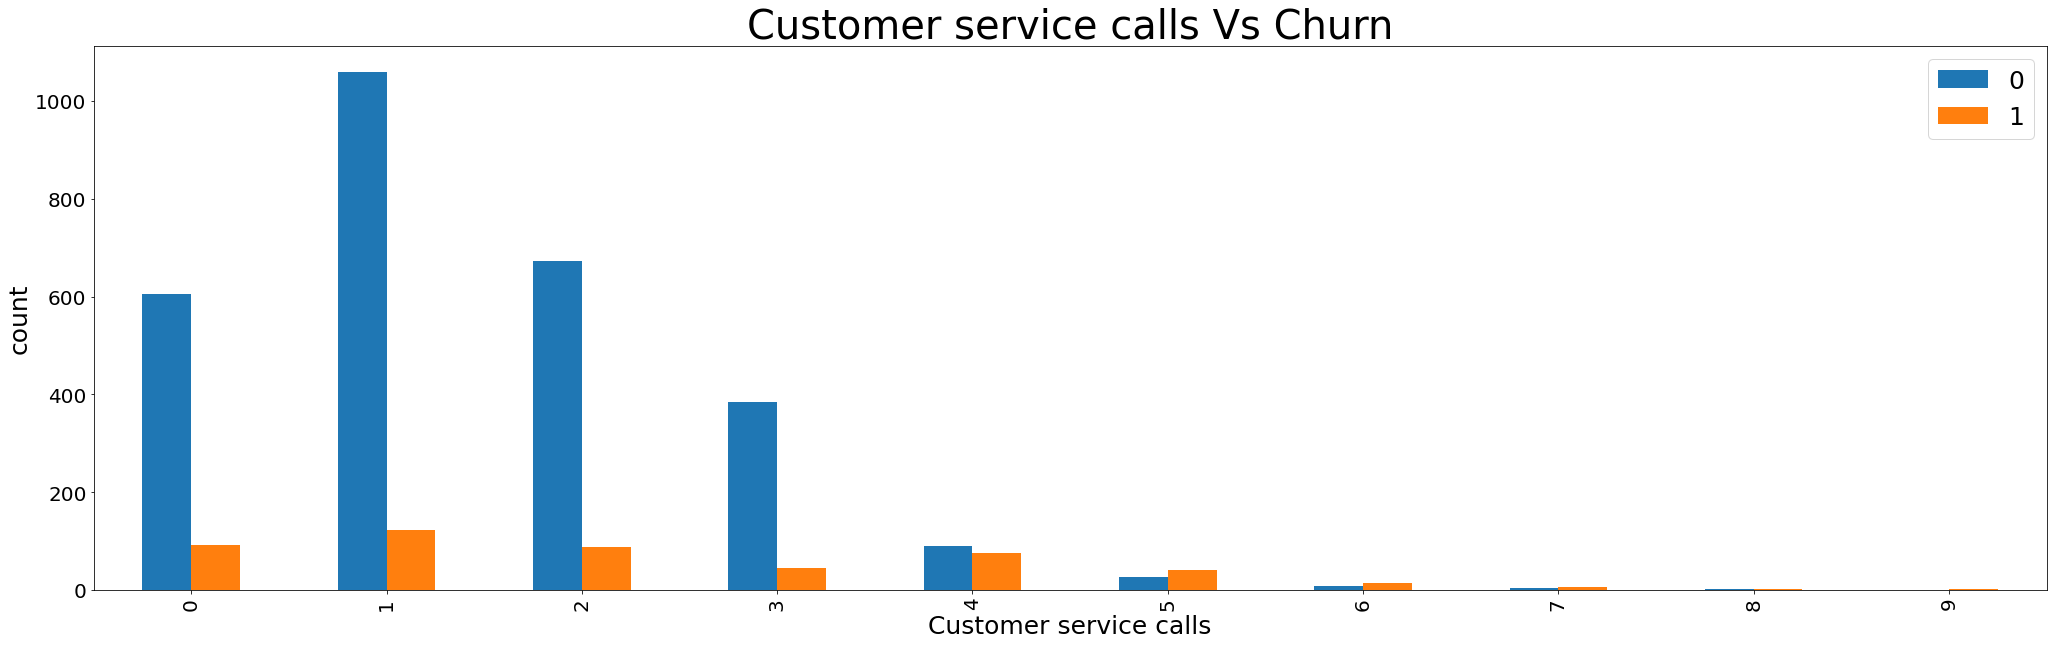

In [ ]:
#Number of Customer_Service Call Wise Churning of customer
diff_bar('Customer service calls','Churn')

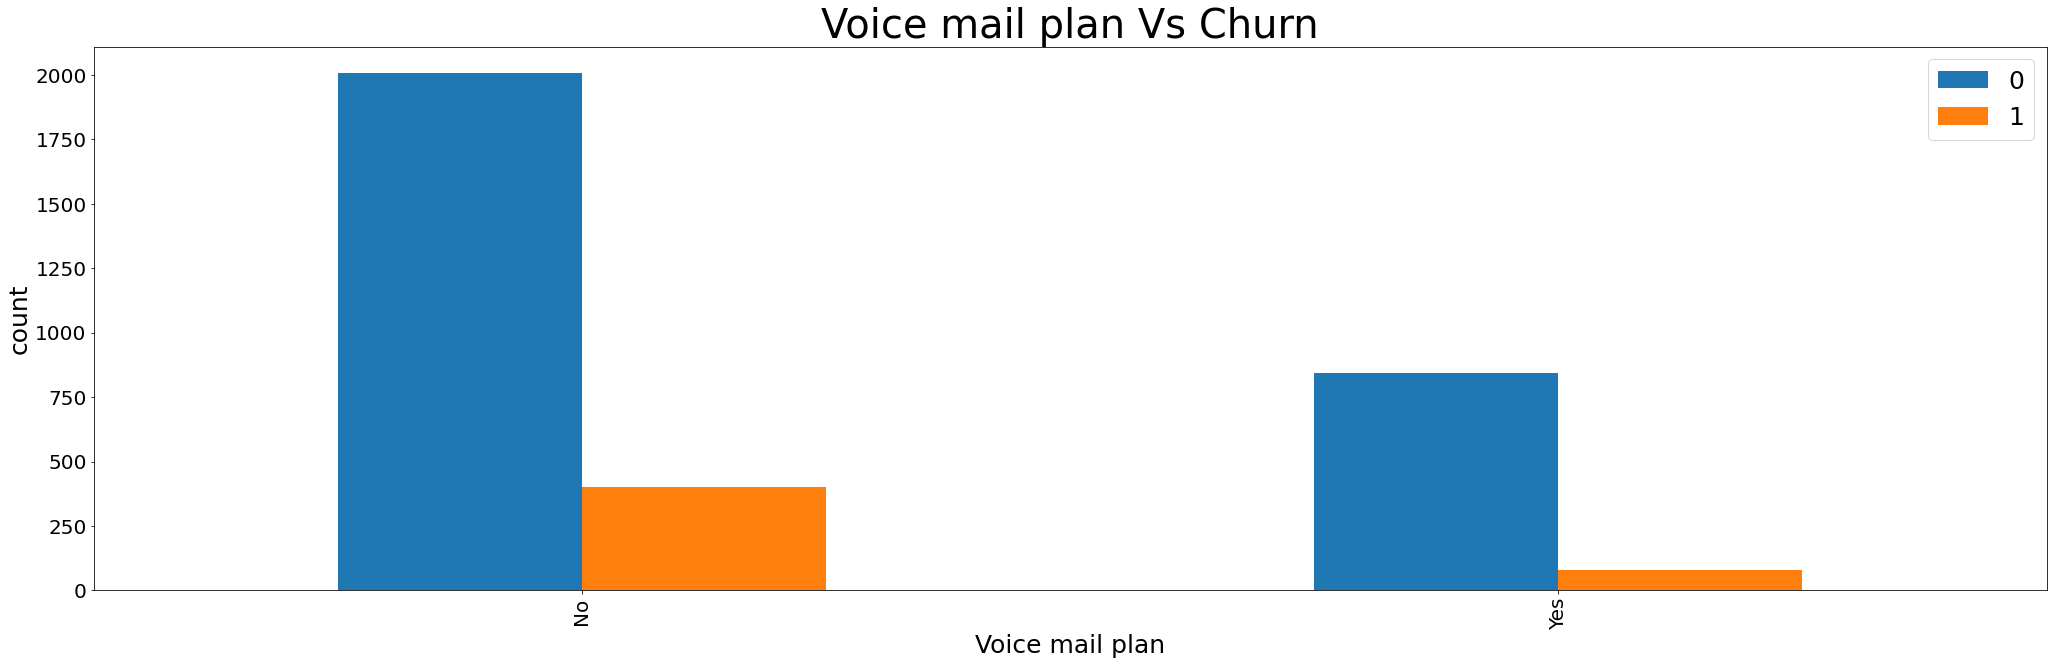

In [ ]:
#No. of Customer Churning and had a Voice mail plan
diff_bar('Voice mail plan','Churn')

In [ ]:
#Scatter plot function
def diff_scattr(x,y):
    fig = plt.figure()
    fig = sns.lmplot(x,y, data=df,fit_reg=False)
    plt.xlabel(x,fontsize= 14)
    plt.ylabel(y,fontsize= 14)
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10)
    plt.title("{X} and {Y} Scatter Plot".format(X=x,Y=y),fontsize = 16)
    #fig.savefig("{X}_and_{Y}_Scatter_Plot..png".format(X=x,Y=y))
    plt.show()

<Figure size 432x288 with 0 Axes>

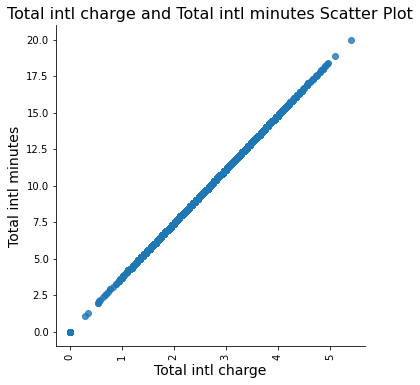

In [ ]:

#Total intl charge and Total intl Minute
diff_scattr('Total intl charge','Total intl minutes')


<Figure size 432x288 with 0 Axes>

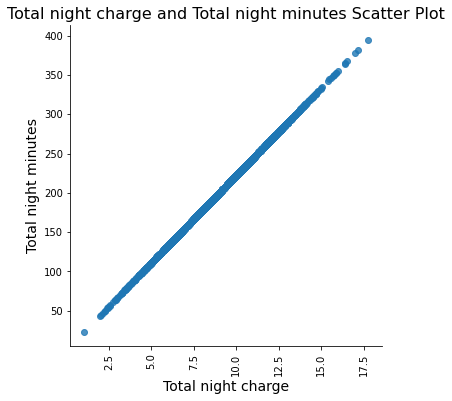

In [ ]:

## Total night charge and Total night Minute
diff_scattr('Total night charge','Total night minutes')

<Figure size 432x288 with 0 Axes>

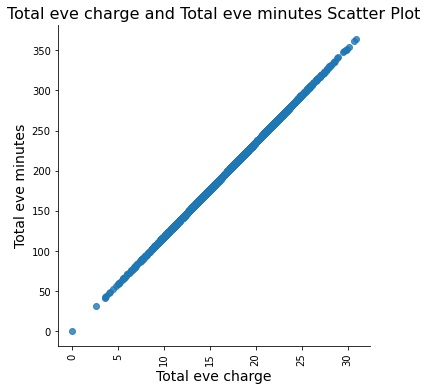

In [ ]:

#Total eve charge and Total eve Minute
diff_scattr('Total eve charge','Total eve minutes')

<Figure size 432x288 with 0 Axes>

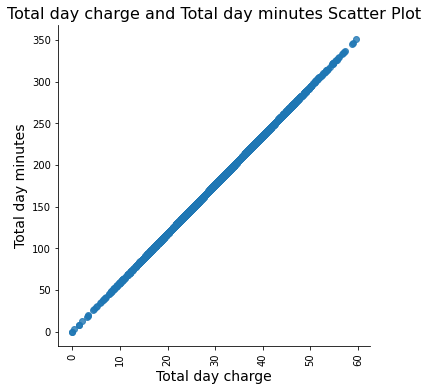

In [ ]:
#Total day charge and Total Day Minute
diff_scattr('Total day charge','Total day minutes')


In [ ]:
#function for converting categoric to num codes
def cat_to_num(df):
    for i in range(0, df.shape[1]):
        #print(i)
        if(df.iloc[:,i].dtypes == 'object'):
            df.iloc[:,i] = pd.Categorical(df.iloc[:,i])
            df.iloc[:,i] = df.iloc[:,i].cat.codes
            df.iloc[:,i] = df.iloc[:,i].astype('object')
    return df


Anomaly Detections or Outlier Analysis

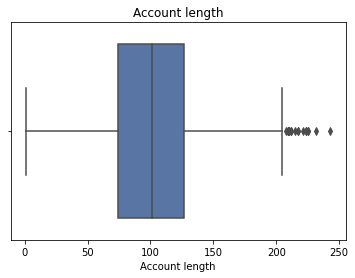

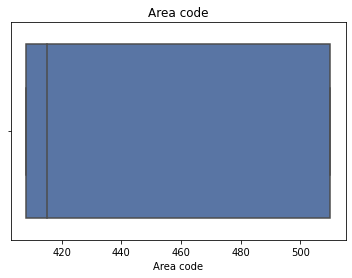

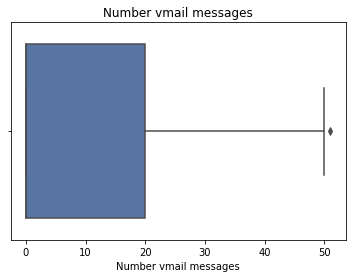

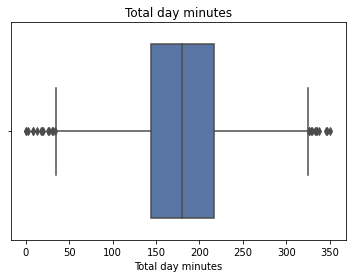

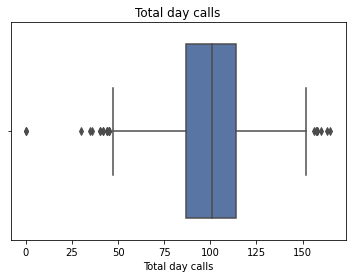

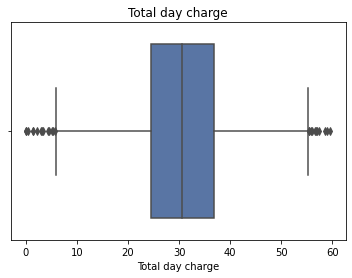

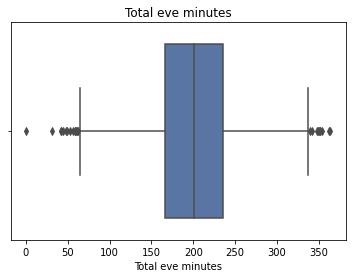

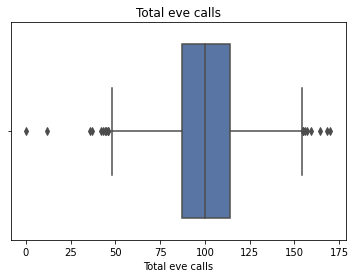

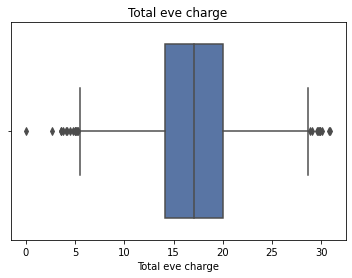

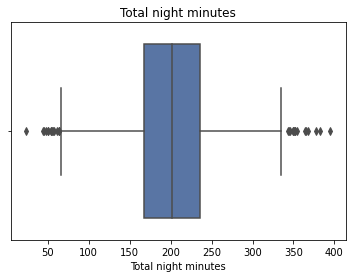

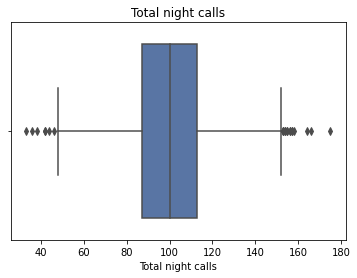

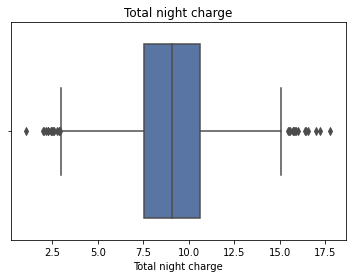

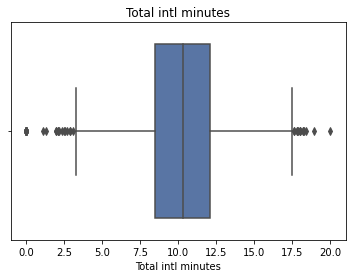

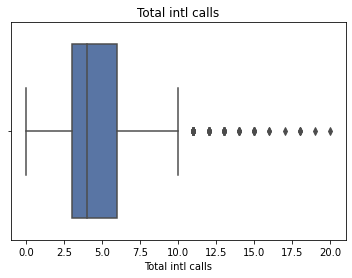

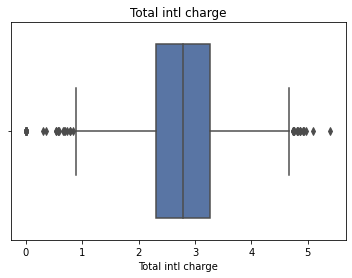

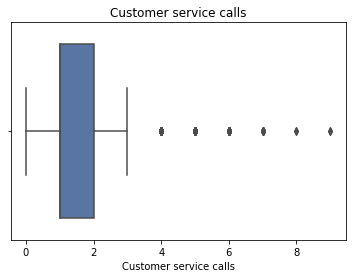

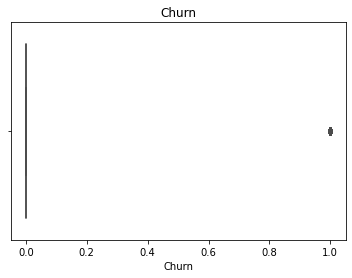

In [ ]:

# #Plotting Box Plot
for i in cname:
    plt.figure()
    plt.clf() #clearing the figure
    sns.boxplot(df[i],palette="deep")
    plt.title(i)
    plt.show()


In [ ]:

#Treating Out Liers and Converting them to nan
for i in cname:
    #print(i)
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25
    minn = q25 - (iqr*1.5)
    maxx = q75 + (iqr*1.5)
#Converting to nan
    df.loc[df.loc[:,i] < minn,i] = np.nan
    df.loc[df.loc[:,i] > maxx,i] = np.nan
    print('{var} -----> {X}   Missing'.format(var = i, X = (df.loc[:,i].isnull().sum())))

Account length -----> 18   Missing
Area code -----> 0   Missing
Number vmail messages -----> 1   Missing
Total day minutes -----> 25   Missing
Total day calls -----> 23   Missing
Total day charge -----> 25   Missing
Total eve minutes -----> 24   Missing
Total eve calls -----> 20   Missing
Total eve charge -----> 24   Missing
Total night minutes -----> 30   Missing
Total night calls -----> 22   Missing
Total night charge -----> 30   Missing
Total intl minutes -----> 46   Missing
Total intl calls -----> 78   Missing
Total intl charge -----> 49   Missing
Customer service calls -----> 267   Missing
Churn -----> 483   Missing


In [ ]:
# Imputing with mean because fancyimpute not working
for i in cname:
    print (i)
    df = df.apply(lambda x:x.fillna(df.loc[:,i].mean()))

Account length
Area code
Number vmail messages
Total day minutes
Total day calls
Total day charge
Total eve minutes
Total eve calls
Total eve charge
Total night minutes
Total night calls
Total night charge
Total intl minutes
Total intl calls
Total intl charge
Customer service calls
Churn


In [ ]:
df.head(1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128.0,415.0,No,Yes,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.7,1.0,0.0


**Feature Selections**

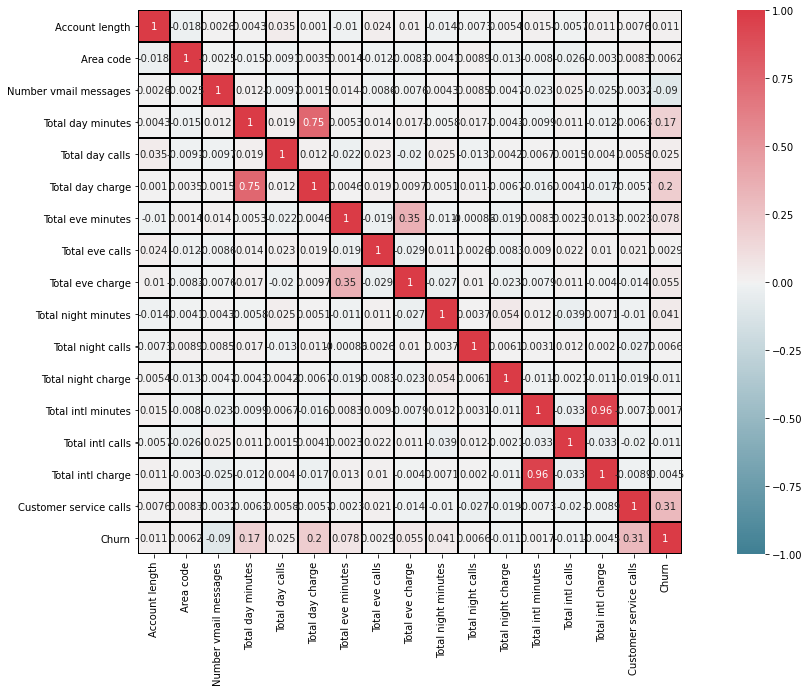

In [ ]:

#Setting up the pane or matrix size
f, ax = plt.subplots(figsize=(20,10))  #Width,height

#Generating Corelation Matrix
corr = df[cname].corr()

#Plot using Seaborn library
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),\
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

plt.show()
#f.savefig('heatmap.png')

In [ ]:
#checking Relation b/w categorical variables with respect to target var
from scipy.stats import chi2_contingency
for i in cat_names:
    print(i)
    #As we know imput to chi square is always a contiguency table so we generating it using crostab function present in pd
    chi2, p, dof, ex =chi2_contingency(pd.crosstab(df['Churn'],df[i]))
    #as above pd.crosstab(dependent variable , independent variable)
    print(p)
    
#chi2 = Actual chi square test value
#p = pvalue
#dof = degree of freedom
#ex = expected value

# As if p value is less than 0.05 then we will reject null hypothesis
#Null = both the variables are independent
#Alternate = Both the variables are not independent

Account length
0.7198811658837777
Area code
0.9150556960243712
Number vmail messages
0.02038151196551766
Total day minutes
1.340211411254832e-08
Total day calls
0.06088820154811875
Total day charge
1.3402114112548077e-08
Total eve minutes
0.44048990999169296
Total eve calls
0.7136373673055564
Total eve charge
0.38821874593696615
Total night minutes
0.7277148150514684
Total night calls
0.4254247437098574
Total night charge
0.7773503492917649
Total intl minutes
0.00966933262016446
Total intl calls
5.950796068643864e-05
Total intl charge
0.00967878000506375
Customer service calls
1.358138739918031e-69


In [ ]:
#Removing correlated variable & the variable which doesn't contain any meaning full info
rmev = ['Account length','Area code'state',Total day minuteTotal day charge','Total eve charge','Total night charge','Total intl charge']
df = df.drop(rmev,axis=1)

KeyError: ignored